In [9]:

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer = fetch_ucirepo(id=14) 
  
# data (as pandas dataframes) 
X = breast_cancer.data.features 
y = breast_cancer.data.targets 
  
# metadata 
print(breast_cancer.metadata) 
  
# variable information 
print(breast_cancer.variables) 

print(breast_cancer)


Note: you may need to restart the kernel to use updated packages.
{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'Breast Cancer Data (Restricted Access)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)\r\n\r\nThis data se

In [71]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer = fetch_ucirepo(id=14)

# data (as pandas dataframes)
X = breast_cancer.data.features
y = breast_cancer.data.targets

# Convertir las features y targets en DataFrames
df_features = pd.DataFrame(data=X)
df_targets = pd.DataFrame(data=y)

# Concatenar las features y targets en un solo DataFrame
df_combined = pd.concat([df_features, df_targets], axis=1)

# Mostrar la metadata
print(breast_cancer.metadata)

# Mostrar los primeros registros del DataFrame combinado
print("\nPrimeros registros del DataFrame combinado:")
print(df_combined.head(25))



{'uci_id': 14, 'name': 'Breast Cancer', 'repository_url': 'https://archive.ics.uci.edu/dataset/14/breast+cancer', 'data_url': 'https://archive.ics.uci.edu/static/public/14/data.csv', 'abstract': 'Breast Cancer Data (Restricted Access)', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 286, 'num_features': 9, 'feature_types': ['Categorical'], 'demographics': ['Age'], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1988, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C51P4M', 'creators': ['Matjaz Zwitter', 'Milan Soklic'], 'intro_paper': None, 'additional_info': {'summary': 'This is one of three domains provided by the Oncology Institute that has repeatedly appeared in the machine learning literature. (See also lymphography and primary-tumor.)\r\n\r\nThis data set includes 201 instances of one class and 85 instances of another 

In [72]:
formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)


df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)


categorical_columns = df_combined.select_dtypes(include=['category']).columns
print(categorical_columns)

df_combined = df_combined.apply(lambda x: x.astype('object') if x.dtype.name == 'category' else x, axis=0)
print(df_combined.isnull().sum())

df_combined = df_combined.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'biufc' else x, axis=0)

categorical_columns = df_combined.select_dtypes(include=['object']).columns
df_combined[categorical_columns] = df_combined[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


print(df_combined.head(25))
print(df_combined.isnull().sum())
formato_uniforme = all(df_combined[col].apply(type).nunique() == 1 for col in df_combined.columns)


Index([], dtype='object')
age             0
menopause       0
tumor-size     32
inv-nodes      66
node-caps       8
deg-malig       0
breast          0
breast-quad     1
irradiat        0
Class           0
dtype: int64
      age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0   30-39   premeno      30-34       0-2        no          3   left   
1   40-49   premeno      20-24       0-2        no          2  right   
2   40-49   premeno      20-24       0-2        no          2   left   
3   60-69      ge40      15-19       0-2        no          2  right   
4   40-49   premeno        0-4       0-2        no          2  right   
5   60-69      ge40      15-19       0-2        no          2   left   
6   50-59   premeno      25-29       0-2        no          2   left   
7   60-69      ge40      20-24       0-2        no          1   left   
8   40-49   premeno      50-54       0-2        no          2   left   
9   40-49   premeno      20-24       0-2        no          2

C:\Users\CarlosZ\AppData\Local\Temp\ipykernel_3112\3845210034.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)
C:\Users\CarlosZ\AppData\Local\Temp\ipykernel_3112\3845210034.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda valor: valor if (len(valor.split('-')) == 2 and valor.split('-')[0].isdigit() and valor.split('-')[1].isdigit()) else pd.np.nan)


In [73]:
# Transformar columnas con formato de rango a valores numéricos representativos
print(df_combined.head(25))


df_combined['age'] = df_combined['age'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['tumor-size'] = df_combined['tumor-size'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))
df_combined['inv-nodes'] = df_combined['inv-nodes'].apply(lambda x: int((int(x.split('-')[0]) + int(x.split('-')[1])) / 2) if '-' in x else int(x))

df_combined['Enfermedad'] = df_combined['Class'].apply(lambda x: 0 if x.startswith('no-recurrence') else 1)

print(df_combined.head(25)) 



      age menopause tumor-size inv-nodes node-caps  deg-malig breast  \
0   30-39   premeno      30-34       0-2        no          3   left   
1   40-49   premeno      20-24       0-2        no          2  right   
2   40-49   premeno      20-24       0-2        no          2   left   
3   60-69      ge40      15-19       0-2        no          2  right   
4   40-49   premeno        0-4       0-2        no          2  right   
5   60-69      ge40      15-19       0-2        no          2   left   
6   50-59   premeno      25-29       0-2        no          2   left   
7   60-69      ge40      20-24       0-2        no          1   left   
8   40-49   premeno      50-54       0-2        no          2   left   
9   40-49   premeno      20-24       0-2        no          2  right   
10  40-49   premeno        0-4       0-2        no          3   left   
11  50-59      ge40      25-29       0-2        no          2   left   
12  60-69      lt40      30-34       0-2        no          1   

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Supongamos que ya tienes cargado tu dataset en un DataFrame llamado 'df'
# Puedes cargarlo desde un archivo CSV, por ejemplo, con df = pd.read_csv('nombre_del_archivo.csv')

# Visualizar las primeras filas del DataFrame
print("Antes del preprocesamiento:")
print(df_combined.head())

# Conversión de variables categóricas a numéricas utilizando Label Encoding
label_encoder = LabelEncoder()
categorical_columns = ['menopause', 'node-caps', 'breast', 'breast-quad', 'irradiat']

for column in categorical_columns:
    df_combined[column] = label_encoder.fit_transform(df_combined[column])

# Normalización de variables numéricas utilizando StandardScaler
numeric_columns = ['age', 'tumor-size', 'inv-nodes', 'deg-malig']

scaler = StandardScaler()
df_combined[numeric_columns] = scaler.fit_transform(df_combined[numeric_columns])

# Visualizar las primeras filas del DataFrame después del preprocesamiento
print("\nDespués del preprocesamiento:")
print(df_combined.head())

# División del dataset en entrenamiento y validación
train_data, validation_data = train_test_split(df_combined, test_size=0.2, random_state=42)

# Visualizar las dimensiones de los conjuntos de entrenamiento y validación
print("\nDimensiones de los conjuntos de entrenamiento y validación:")
print("Entrenamiento:", train_data.shape)
print("Validación:", validation_data.shape)


Antes del preprocesamiento:
   age menopause  tumor-size  inv-nodes node-caps  deg-malig breast  \
0   34   premeno          32          1        no          3   left   
1   44   premeno          22          1        no          2  right   
2   44   premeno          22          1        no          2   left   
3   64      ge40          17          1        no          2  right   
4   44   premeno           2          1        no          2  right   

  breast-quad irradiat                 Class  Enfermedad  
0    left_low       no  no-recurrence-events           0  
1    right_up       no  no-recurrence-events           0  
2    left_low       no  no-recurrence-events           0  
3     left_up       no  no-recurrence-events           0  
4   right_low       no  no-recurrence-events           0  

Después del preprocesamiento:
        age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0 -1.647779          2    0.360593  -0.155446          0   1.290564       0   
1 

Epoch 1/100, Loss: 6.798735033001816
Epoch 2/100, Loss: 5.955664919133772
Epoch 3/100, Loss: 5.294730069344504
Epoch 4/100, Loss: 4.776021923935204
Epoch 5/100, Loss: 4.241950051826343
Epoch 6/100, Loss: 3.7905171712239585
Epoch 7/100, Loss: 3.194098188166033
Epoch 8/100, Loss: 2.749088354278029
Epoch 9/100, Loss: 2.399906325758549
Epoch 10/100, Loss: 2.043860017207631
Epoch 11/100, Loss: 1.6385045302541632
Epoch 12/100, Loss: 0.9938430786132812
Epoch 13/100, Loss: 0.4599627779241194
Epoch 14/100, Loss: -0.612543457432797
Epoch 15/100, Loss: -0.7134525566770319
Epoch 16/100, Loss: -1.957505845187003
Epoch 17/100, Loss: -2.2967799002664133
Epoch 18/100, Loss: -2.908577801888449
Epoch 19/100, Loss: -4.082128424393503
Epoch 20/100, Loss: -5.79647505910773
Epoch 21/100, Loss: -7.788836562842653
Epoch 22/100, Loss: -10.95412163985403
Epoch 23/100, Loss: -14.331057096782484
Epoch 24/100, Loss: -18.329133418568393
Epoch 25/100, Loss: -23.05222093013295
Epoch 26/100, Loss: -25.430330510725057


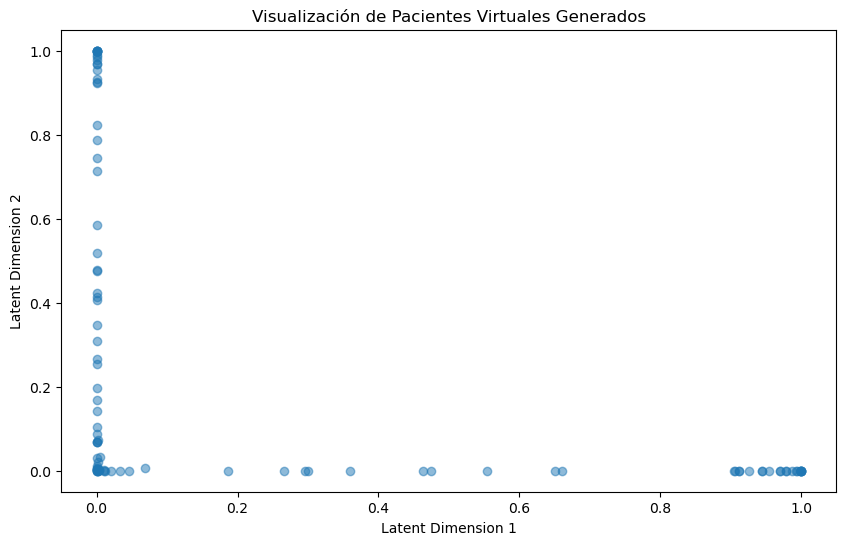

In [113]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Convertir el DataFrame a tensores de PyTorch
X = df_combined.drop(columns=['Class']).values  # Eliminar la columna 'Class' para la entrada del VAE
X = torch.tensor(X, dtype=torch.float32)

# Parámetros
input_size = X.shape[1]
latent_size = 10 #5  # Tamaño del espacio latente
batch_size = 64
epochs = 100 #50

# Modelo VAE
class VAE(nn.Module):
    def __init__(self, input_size, latent_size):
        super(VAE, self).__init__()

        # Encoder
        self.fc1 = nn.Linear(input_size, 128)
        self.fc_mu = nn.Linear(128, latent_size)
        self.fc_logvar = nn.Linear(128, latent_size)

        # Decoder
        self.fc2 = nn.Linear(latent_size, 128)
        self.fc3 = nn.Linear(128, input_size)

    def encode(self, x):
        x = torch.relu(self.fc1(x))
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        z = torch.relu(self.fc2(z))
        x_hat = torch.sigmoid(self.fc3(z))
        return x_hat

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decode(z)
        return x_hat, mu, logvar

# Instanciar el modelo VAE y el optimizador
vae = VAE(input_size, latent_size)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

# Función de pérdida (Negative Log Likelihood más regularización KL)
def loss_function(x_hat, x, mu, logvar):
    reconstruction_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + kl_divergence

# División de datos en entrenamiento y validación
X_train, X_val = train_test_split(X.numpy(), test_size=0.2, random_state=42)

# Normalizar los datos de entrenamiento y validación
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convertir de nuevo a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)

# Crear conjuntos de datos y dataloaders
train_dataset = TensorDataset(X_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_val)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Entrenamiento del VAE
vae.train()
for epoch in range(epochs):
    total_loss = 0
    for batch in train_dataloader:
        optimizer.zero_grad()
        x = batch[0]
        x_hat, mu, logvar = vae(x)
        loss = loss_function(x_hat, x, mu, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_dataset)}')

# Generación de pacientes virtuales
vae.eval()
with torch.no_grad():
    # Muestreo aleatorio desde el espacio latente
    latent_samples = torch.randn(100, latent_size)
    generated_data = vae.decode(latent_samples).numpy()

# Crear DataFrame con datos generados
generated_df = pd.DataFrame(data=generated_data, columns=df_combined.columns[:-1])  # Excluir la columna 'Class'
print("Pacientes virtuales generados:")
print(generated_df.head())

# Visualización de pacientes virtuales generados
plt.figure(figsize=(10, 6))
plt.scatter(generated_data[:, 0], generated_data[:, 1], alpha=0.5)
plt.title('Visualización de Pacientes Virtuales Generados')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()


In [109]:
print("Dimensiones de X_val:", X_val.numpy().shape)
print("Dimensiones de generated_data:", generated_data.shape)


Dimensiones de X_val: (58, 10)
Dimensiones de generated_data: (100, 10)


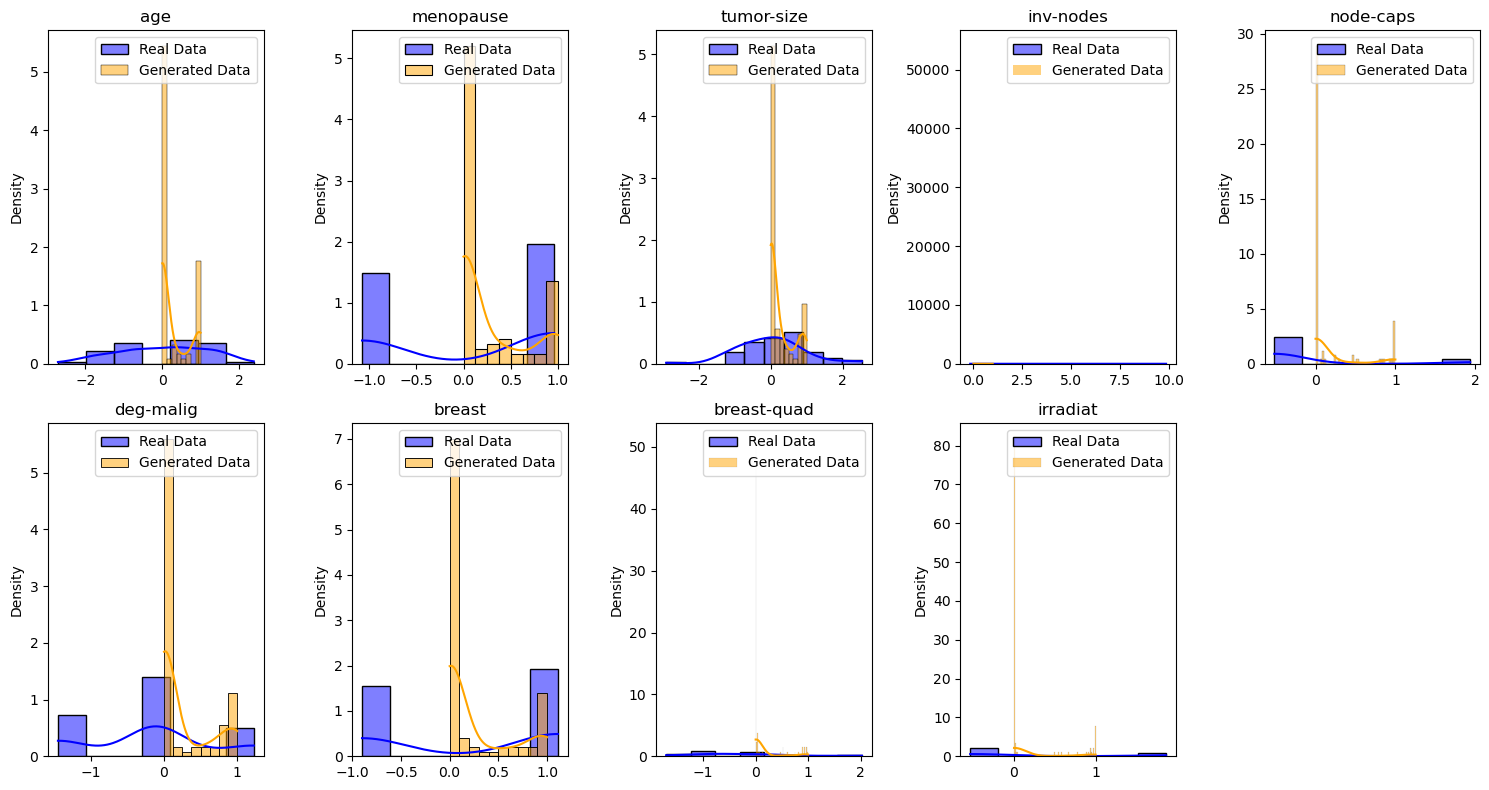

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       100
         1.0       1.00      1.00      1.00        58

    accuracy                           1.00       158
   macro avg       1.00      1.00      1.00       158
weighted avg       1.00      1.00      1.00       158



In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Función para comparar distribuciones marginales
def compare_marginal_distributions(real_data, generated_data, feature_names):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8))
    for i, ax in enumerate(axes.flatten()):
        if i < len(feature_names):
            sns.histplot(real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
            sns.histplot(generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
            ax.set_title(feature_names[i])
            ax.legend()
        else:
            # Si no hay más características, desactiva los subgráficos restantes
            ax.axis('off')

    plt.tight_layout()
    plt.show()

# Función para validar usando un clasificador
def validate_with_classifier(real_data, generated_data):
    X = np.vstack([real_data, generated_data])
    y = np.concatenate([np.ones(len(real_data)), np.zeros(len(generated_data))])

    # Entrenar un clasificador (Random Forest en este caso)
    classifier = RandomForestClassifier(n_estimators=50, random_state=42)  # Puedes reducir el número de estimadores

 #    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X, y)

    # Hacer predicciones y calcular métricas
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    report = classification_report(y, y_pred)

    print(f'Accuracy: {accuracy}')
    print('\nClassification Report:\n', report)

# Validar distribuciones marginales
compare_marginal_distributions(X_val.numpy(), generated_data, generated_df.columns[:-1])

# Validar usando un clasificador
validate_with_classifier(X_val.numpy(), generated_data)


In [86]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_combined['Class'] = label_encoder.fit_transform(df_combined['Class'])

# Parámetros
input_dim = df_combined.shape[1] - 1  # Excluyendo la columna 'Class'
latent_dim = 2  # Dimensión del espacio latente
num_classes = len(df_combined['Class'].unique())

# Función para la capa de muestreo
def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder
inputs = Input(shape=(input_dim,))
class_input = Input(shape=(1,))
merged_inputs = Concatenate()([inputs, class_input])

x = Dense(128, activation='relu')(merged_inputs)
x = Dense(64, activation='relu')(x)

z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)

# Muestreo en el espacio latente
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder
z_cond = Concatenate()([z, class_input])

decoder_h = Dense(64, activation='relu')
decoder_mean = Dense(input_dim)

h_decoded = decoder_h(z_cond)
x_decoded_mean = decoder_mean(h_decoded)

# Modelo completo
cvae = Model([inputs, class_input], x_decoded_mean)

# Pérdida y función de entrenamiento
xent_loss = tf.keras.losses.mean_squared_error(inputs, x_decoded_mean)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)

cvae.add_loss(vae_loss)
cvae.compile(optimizer='adam')


In [119]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Embedding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Supongamos que 'df_combined' es tu DataFrame
features_for_clustering = df_combined.drop(columns=['Class']).values

# Determinar el número de clusters (estratos)
num_clusters = 5  # Puedes ajustar este número según tus necesidades

# Aplicar KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df_combined['Cluster'] = kmeans.fit_predict(features_for_clustering)

# Imprimir el DataFrame con la nueva columna 'Cluster'
print(df_combined.head())

# Convertir el DataFrame a tensores de PyTorch
X = df_combined.drop(columns=['Class', 'Cluster']).values
X = torch.tensor(X, dtype=torch.float32)

# Parámetros
input_size = X.shape[1]
latent_size = 5  # Tamaño del espacio latente
batch_size = 64
epochs = 50

# Modelo VAE condicional (CVAE)
class CVAE(tf.keras.Model):
    def __init__(self, input_size, latent_size, num_clusters):
        super(CVAE, self).__init__()

        # Encoder
        self.fc1 = Dense(128, activation='relu')
        self.fc_mu = Dense(latent_size)
        self.fc_logvar = Dense(latent_size)
        self.embed_layer = Embedding(num_clusters, num_clusters)

        # Decoder
        self.fc2 = Dense(128, activation='relu')
        self.fc3 = Dense(input_size, activation='sigmoid')

    def encode(self, x, c):
        x = tf.concat([x, self.embed_layer(c)], axis=1)
        x = self.fc1(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = tf.exp(0.5 * logvar)
        eps = tf.random.normal(shape=K.shape(std))
        return mu + eps * std

    def decode(self, z, c):
        z_cond = tf.concat([z, self.embed_layer(c)], axis=1)
        z_cond = self.fc2(z_cond)
        x_hat = self.fc3(z_cond)
        return x_hat

    def call(self, inputs):
        x, c = inputs
        mu, logvar = self.encode(x, c)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decode(z, c)
        return x_hat, mu, logvar

# Instanciar el modelo CVAE y el optimizador
cvae = CVAE(input_size, latent_size, num_clusters)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Compilar el modelo
cvae.compile(optimizer=optimizer, loss=loss_function)


# Función de pérdida (Negative Log Likelihood más regularización KL)
def loss_function(x, x_hat, mu, logvar):
    reconstruction_loss = tf.keras.losses.binary_crossentropy(x, x_hat)
    reconstruction_loss *= input_size
    kl_divergence = -0.5 * tf.reduce_sum(1 + logvar - tf.square(mu) - tf.exp(logvar), axis=-1)
    return tf.reduce_mean(reconstruction_loss + kl_divergence)

# División de datos en entrenamiento y validación
X_train, X_val = train_test_split(df_combined, test_size=0.2, random_state=42, stratify=df_combined['Cluster'])

# Normalizar los datos de entrenamiento y validación
scaler = StandardScaler()
X_train_features = scaler.fit_transform(X_train.drop(columns=['Class', 'Cluster']))
X_val_features = scaler.transform(X_val.drop(columns=['Class', 'Cluster']))

# Convertir de nuevo a tensores de PyTorch
X_train_features = torch.tensor(X_train_features, dtype=torch.float32)
X_val_features = torch.tensor(X_val_features, dtype=torch.float32)

# Crear conjuntos de datos y dataloaders
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_features, X_train['Cluster']))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_features, X_val['Cluster']))
val_dataset = val_dataset.batch(batch_size)

# Entrenamiento del CVAE
for epoch in range(epochs):
    total_loss = 0
    for features, cluster in train_dataset:
        with tf.GradientTape() as tape:
            x_hat, mu, logvar = cvae([features, cluster])
            loss = loss_function(features, x_hat, mu, logvar)
        gradients = tape.gradient(loss, cvae.trainable_variables)
        optimizer.apply_gradients(zip(gradients, cvae.trainable_variables))
        total_loss += loss

    print(f'Epoch {epoch + 1}/{epochs}, Loss: {total_loss / len(train_dataset)}')


# Validar pacientes virtuales estratificados usando los métodos del paso 3
losses = []
for features, cluster in val_dataset:
    x_hat, mu, logvar = cvae([features, cluster])
    loss = loss_function(features, x_hat, mu, logvar)
    losses.append(loss.numpy())

average_loss = np.mean(losses)
print(f'Validation Loss: {average_loss}')


# Validar pacientes virtuales estratificados usando los métodos del paso 3
#cvae.evaluate(val_dataset)


c:\Users\CarlosZ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\CarlosZ\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


        age  menopause  tumor-size  inv-nodes  node-caps  deg-malig  breast  \
0 -1.647779          2    0.360593  -0.155446          0   1.290564       0   
1 -0.657727          2   -0.736530  -0.155446          0  -0.066426       1   
2 -0.657727          2   -0.736530  -0.155446          0  -0.066426       0   
3  1.322377          0   -1.285092  -0.155446          0  -0.066426       1   
4 -0.657727          2   -2.930776  -0.155446          0  -0.066426       1   

   breast-quad  irradiat  Class  Enfermedad  Cluster  
0            1         0      0           0        0  
1            4         0      0           0        2  
2            1         0      0           0        0  
3            2         0      0           0        1  
4            3         0      0           0        2  
Epoch 1/50, Loss: 7.433257102966309
Epoch 2/50, Loss: 6.8495330810546875
Epoch 3/50, Loss: 6.461824417114258
Epoch 4/50, Loss: 6.009149551391602
Epoch 5/50, Loss: 5.608391761779785
Epoch 6/50, Lo

IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 58

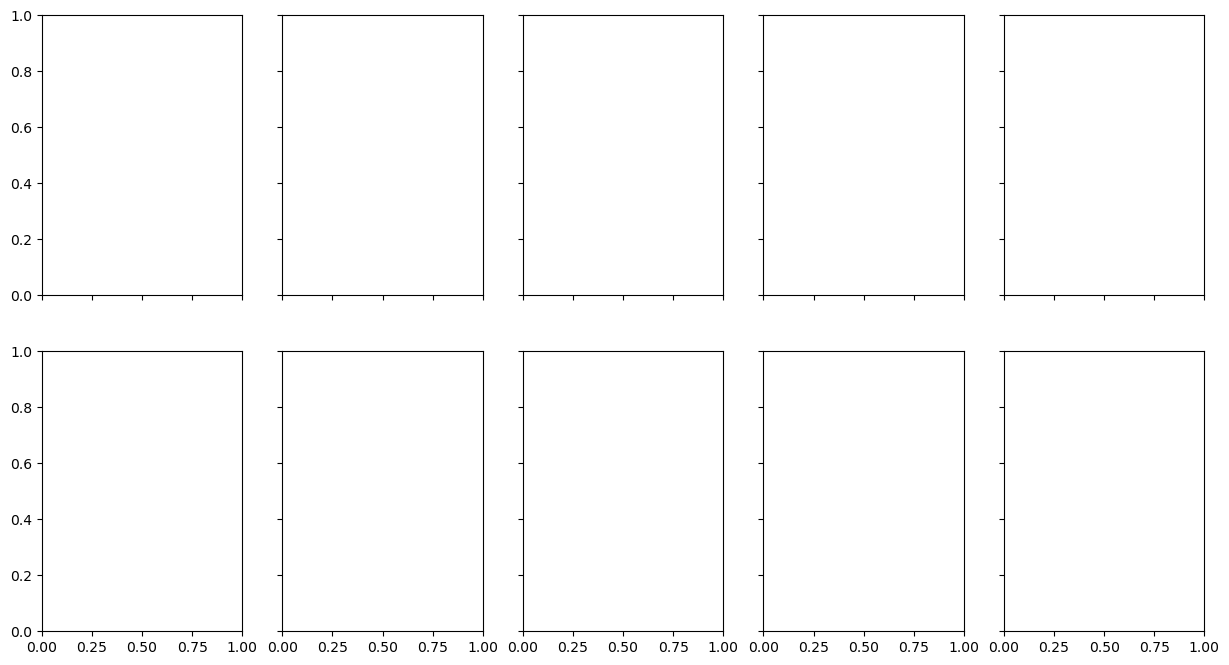

In [137]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier


def compare_marginal_distributions_by_stratum(real_data, generated_data, feature_names, strata):
    num_strata = len(np.unique(strata))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8), sharex=True, sharey=True)

    for stratum in range(num_strata):
        current_stratum = np.array(strata)
        stratum_real_data = real_data[current_stratum == stratum]
        stratum_generated_data = generated_data[current_stratum == stratum]

        print(f"Stratum: {stratum}, Current Stratum: {current_stratum}, Real Data Shape: {stratum_real_data.shape}, Generated Data Shape: {stratum_generated_data.shape}")

        for i, ax in enumerate(axes.flatten()):
            if i < len(feature_names):
                sns.histplot(stratum_real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
                sns.histplot(stratum_generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
                ax.set_title(f"Stratum {stratum}, {feature_names[i]}")
                ax.legend()
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

# Función para validar usando un clasificador por estrato
def validate_with_classifier_by_stratum(real_data, generated_data, strata):
    num_strata = len(np.unique(strata))
    for stratum in range(num_strata):
        # Asegúrate de que strata sea un array NumPy
        stratum_real_data = real_data[np.array(strata) == stratum]
        stratum_generated_data = generated_data[np.array(strata) == stratum]

        X_stratum = np.vstack([stratum_real_data, stratum_generated_data])
        y_stratum = np.concatenate([np.ones(len(stratum_real_data)), np.zeros(len(stratum_generated_data))])

        # Entrenar un clasificador (Random Forest en este caso)
        classifier = RandomForestClassifier(random_state=42)
        classifier.fit(X_stratum, y_stratum)

        # Hacer predicciones y calcular métricas
        y_pred_stratum = classifier.predict(X_stratum)
        accuracy_stratum = accuracy_score(y_stratum, y_pred_stratum)
        report_stratum = classification_report(y_stratum, y_pred_stratum)

        print(f'Stratum {stratum} - Accuracy: {accuracy_stratum}')
        print('Classification Report:\n', report_stratum)

# Validar distribuciones marginales por estrato
compare_marginal_distributions_by_stratum(X_val.values, generated_data, df_combined.columns[:-1], X_val['Cluster'])

# Validar usando un clasificador por estrato
validate_with_classifier_by_stratum(X_val.values, generated_data, X_val['Cluster'])




IndexError: boolean index did not match indexed array along dimension 0; dimension is 100 but corresponding boolean dimension is 58

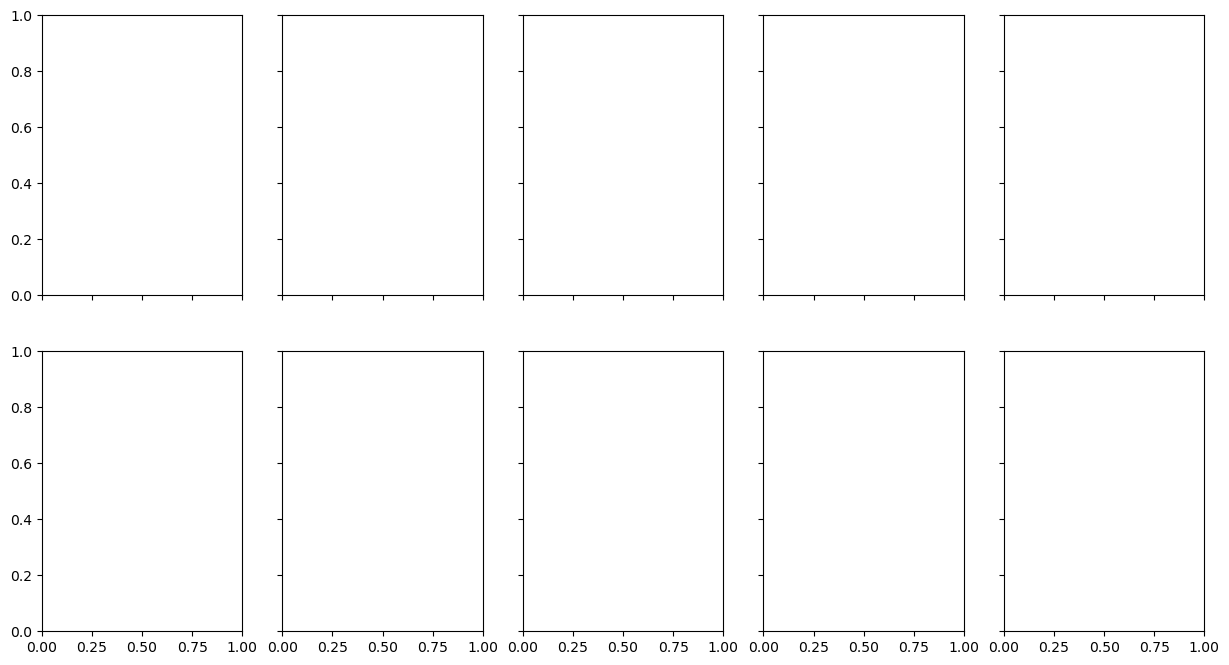

In [136]:
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

def compare_marginal_distributions_by_stratum(real_data, generated_data, feature_names, strata):
    num_strata = len(np.unique(strata))
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 8), sharex=True, sharey=True)

    for stratum in range(num_strata):
        # Asegúrate de que strata sea un array NumPy
        stratum_real_data = real_data[np.array(strata) == stratum]
        stratum_generated_data = generated_data[np.array(strata) == stratum]

        print(f"Stratum: {stratum}, Real Data Shape: {stratum_real_data.shape}, Generated Data Shape: {stratum_generated_data.shape}")

        for i, ax in enumerate(axes.flatten()):
            if i < len(feature_names):
                sns.histplot(stratum_real_data[:, i], kde=True, color='blue', ax=ax, label='Real Data', stat='density')
                sns.histplot(stratum_generated_data[:, i], kde=True, color='orange', ax=ax, label='Generated Data', stat='density')
                ax.set_title(f"Stratum {stratum}, {feature_names[i]}")
                ax.legend()
            else:
                ax.axis('off')

    plt.tight_layout()
    plt.show()

compare_marginal_distributions_by_stratum(X_val.values, generated_data, generated_df.columns[:-1], X_val['Cluster'])


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Simula un conjunto de datos con valores numéricos y celdas faltantes
# Reemplaza esto con tu DataFrame real
num_samples = 1000
num_features = 10
data = np.random.randn(num_samples, num_features)
missing_mask = np.random.rand(num_samples, num_features) < 0.1  # Simula valores faltantes
data[missing_mask] = np.nan

# Imputación simple para manejar valores faltantes
data_imputed = pd.DataFrame(data).fillna(data.mean())

# Define la arquitectura del encoder y decoder
latent_dim = 8

encoder_inputs = keras.Input(shape=(num_features,))
x = layers.Dense(64, activation="relu")(encoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.BatchNormalization()(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")

decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(32, activation="relu")(decoder_inputs)
x = layers.BatchNormalization()(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.BatchNormalization()(x)
decoder_outputs = layers.Dense(num_features, activation="linear")(x)
decoder = keras.Model(decoder_inputs, decoder_outputs, name="decoder")

# Define la clase del VAE y su arquitectura
class NumericVAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(NumericVAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.mean_squared_error(data, reconstruction),
                    axis=1,
                )
            )

            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))

            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

# Instancia y compila el modelo VAE
vae = NumericVAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())

# Entrenamiento del modelo VAE en los datos
vae.fit(data_imputed, epochs=30, batch_size=32)
